# Inferential Analysis and Statistical Insights

This notebook explores relationships between risk factors, cancer severity, treatment costs, and survival outcomes using statistical analysis and visualization.

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from openpyxl.styles.builtins import normal

In [16]:
data = pd.read_csv("../data/raw/global_cancer_patients.csv")
data.head()

,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
0,PT0000000,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92
1,PT0000001,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65
2,PT0000002,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84
3,PT0000003,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12
4,PT0000004,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62


Determine the relationship between risk factors and cancer severity

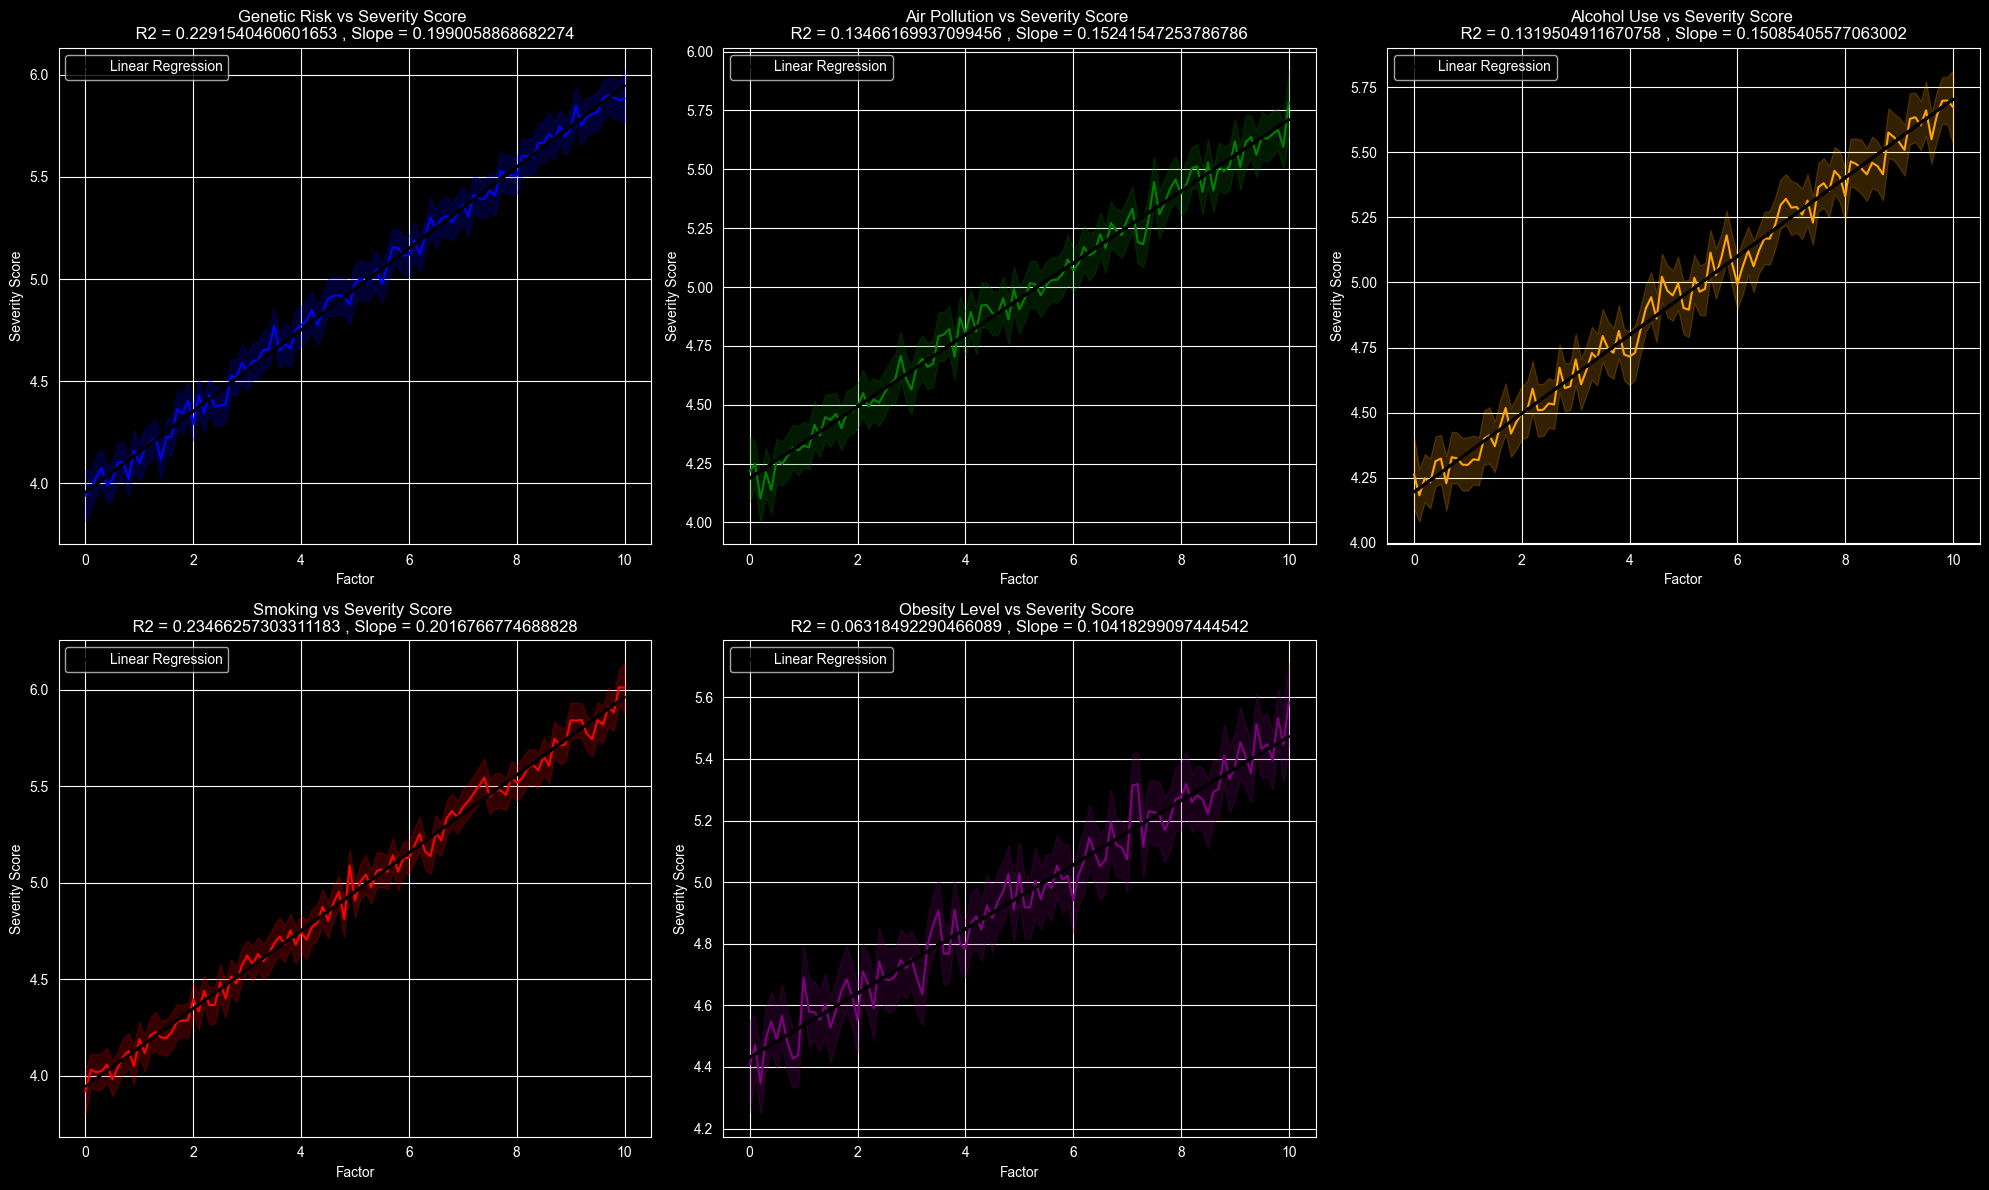

In [17]:
from scipy.stats import linregress # because we will find relationship between two variables
risk_factors=['Genetic_Risk','Air_Pollution', 'Alcohol_Use', 'Smoking', 'Obesity_Level']

titles =['Genetic Risk','Air Pollution', 'Alcohol Use', 'Smoking', 'Obesity Level']

colors= ["blue" , "green" , "orange" , "red" , "purple"]

plt.figure(figsize=(20,12))
for i ,(factor , title ,color) in enumerate(zip(risk_factors , titles , colors),1):
    #Automated analysis across multiple risk factors using a loop instead of repeating code.
    plt.subplot(2,3,i)

    x=data[factor]
    y=data["Target_Severity_Score"]
    slope, intercept, r_value, p_value, std_err = linregress(x,y) #This calculates regression statistics
    r_squared = r_value**2

    sns.lineplot(x=factor , y="Target_Severity_Score", data=data, color=color)
    plt.plot(x,x*slope+intercept, color="black" ,linewidth=2 ,label="Linear Regression")
    plt.title(f"{title} vs Severity Score \n R2 = {r_squared} , Slope = {slope} ")
    plt.xlabel("Factor")
    plt.ylabel("Severity Score")
    plt.legend()

#line = y=mx+c [m = slope ,c = intercept]
plt.tight_layout()
plt.show()



### Analysis and Interpretation

Linear regression analysis was performed to examine the relationship between individual risk factors and cancer severity score.

All risk factors — Genetic Risk, Air Pollution, Alcohol Use, Smoking, and Obesity Level — show a positive linear relationship with cancer severity. This means that as the level of each risk factor increases, the severity score also tends to increase.

However, the R² values range approximately between 0.06 and 0.23, which indicates that each factor individually explains only a small portion of the variation in cancer severity.

Among the variables:
- Smoking and Genetic Risk show relatively stronger relationships.
- Air Pollution and Alcohol Use demonstrate moderate associations.
- Obesity Level shows the weakest individual impact.

Overall, no single risk factor alone strongly predicts cancer severity.

### Key Insight

Cancer severity appears to be influenced by multiple factors acting together rather than a single risk factor. While each variable contributes positively to severity, their individual impact is limited, suggesting that cancer progression is multifactorial in nature.

### Analyze the proportion of early -stage diagnoses by cancer type

In [18]:
data["Cancer_Type"].unique()

array(['Lung', 'Leukemia', 'Breast', 'Colon', 'Skin', 'Cervical',
       'Prostate', 'Liver'], dtype=object)

In [19]:
stage_count = data[data["Cancer_Type"]=="Lung"]["Cancer_Stage"].value_counts()
early_stage_sum = stage_count.get("Stage 0",0)+stage_count.get("Stage I",0)
total_sum = stage_count.sum()
proportion = (early_stage_sum/total_sum)*100
print(f"proportion of lungs cancer diagnosed at stage0 and stage1= {proportion}")

proportion of lungs cancer diagnosed at stage0 and stage1= 38.43156356551388


In [20]:
stage_count = data[data["Cancer_Type"]=="Leukemia"]["Cancer_Stage"].value_counts()
early_stage_sum = stage_count.get("Stage 0",0)+stage_count.get("Stage I",0)
total_sum = stage_count.sum()
proportion = (early_stage_sum/total_sum)*100
print(f"proportion of Leukemia cancer diagnosed at stage0 and stage1= {proportion}")

proportion of Leukemia cancer diagnosed at stage0 and stage1= 39.53080114905841


In [21]:
stage_count = data[data["Cancer_Type"]=="Breast"]["Cancer_Stage"].value_counts()
early_stage_sum = stage_count.get("Stage 0",0)+stage_count.get("Stage I",0)
total_sum = stage_count.sum()
proportion = (early_stage_sum/total_sum)*100
print(f"proportion of Breast cancer diagnosed at stage0 and stage1= {proportion}")

proportion of Breast cancer diagnosed at stage0 and stage1= 39.47325900791727


In [22]:
stage_count = data[data["Cancer_Type"]=="Colon"]["Cancer_Stage"].value_counts()
early_stage_sum = stage_count.get("Stage 0",0)+stage_count.get("Stage I",0)
total_sum = stage_count.sum()
proportion = (early_stage_sum/total_sum)*100
print(f"proportion of Colon cancer diagnosed at stage0 and stage1= {proportion}")

proportion of Colon cancer diagnosed at stage0 and stage1= 40.41718946047679


In [23]:
stage_count = data[data["Cancer_Type"]=="Skin"]["Cancer_Stage"].value_counts()
early_stage_sum = stage_count.get("Stage 0",0)+stage_count.get("Stage I",0)
total_sum = stage_count.sum()
proportion = (early_stage_sum/total_sum)*100
print(f"proportion of Skin cancer diagnosed at stage0 and stage1= {proportion}")

proportion of Skin cancer diagnosed at stage0 and stage1= 40.41084898090194


In [24]:
stage_count = data[data["Cancer_Type"]=="Cervical"]["Cancer_Stage"].value_counts()
early_stage_sum = stage_count.get("Stage 0",0)+stage_count.get("Stage I",0)
total_sum = stage_count.sum()
proportion = (early_stage_sum/total_sum)*100
print(f"proportion of Cervical cancer diagnosed at stage0 and stage1= {proportion}")

proportion of Cervical cancer diagnosed at stage0 and stage1= 39.85856637737062


In [25]:
stage_count = data[data["Cancer_Type"]=="Prostate"]["Cancer_Stage"].value_counts()
early_stage_sum = stage_count.get("Stage 0",0)+stage_count.get("Stage I",0)
total_sum = stage_count.sum()
proportion = (early_stage_sum/total_sum)*100
print(f"proportion of Prostate cancer diagnosed at stage0 and stage1= {proportion}")

proportion of Prostate cancer diagnosed at stage0 and stage1= 40.187064045656314


In [26]:
stage_count = data[data["Cancer_Type"]=="Liver"]["Cancer_Stage"].value_counts()
early_stage_sum = stage_count.get("Stage 0",0)+stage_count.get("Stage I",0)
total_sum = stage_count.sum()
proportion = (early_stage_sum/total_sum)*100
print(f"proportion of Liver cancer diagnosed at stage0 and stage1= {proportion}")

proportion of Liver cancer diagnosed at stage0 and stage1= 40.614498319731155


### Analysis and Interpretation

The analysis shows that early-stage cancer diagnosis occurs at a similar rate across all cancer types, with approximately 38% to 41% of cases detected at Stage I.

Liver cancer has the highest proportion of early detection, while lung cancer has the lowest. This indicates that although early diagnosis is fairly common, a large number of cases are still being identified at later stages.

The small differences between cancer types suggest that current screening and diagnostic practices are working at a comparable level across cancers, but there is still room for improvement — especially in detecting lung cancer earlier.

### Key Insight

Overall, around 40% of cancers are diagnosed early, which is encouraging but also highlights an opportunity to improve early detection methods. Strengthening screening programs and adopting better diagnostic technologies could help increase early-stage identification and improve patient survival outcomes.

# Identify key predictors of cancer severity and survival years.

In [27]:
feature=['Age','Genetic_Risk','Air_Pollution', 'Alcohol_Use', 'Smoking', 'Obesity_Level']
target =['Survival_Years','Target_Severity_Score']

#Calculate correlations
pearson_corr=data[feature+target].corr(method="pearson")
spearman_corr=data[feature+target].corr(method="spearman")

#slice out only the relationship with target variables
pearson_result = pearson_corr[target]
spearman_result = spearman_corr[target]

#combine both
correlation_df = pd.concat([pearson_result,spearman_result],axis=1 ,keys=['Pearson' ,'Spearman'])

correlation_df

Pearson                             Spearman  \
                      Survival_Years Target_Severity_Score Survival_Years   
Age                        -0.000147             -0.001481      -0.000149   
Genetic_Risk                0.001708              0.478700       0.001684   
Air_Pollution               0.000893              0.366963       0.000841   
Alcohol_Use                -0.000527              0.363250      -0.000543   
Smoking                     0.001371              0.484420       0.001372   
Obesity_Level               0.009771              0.251366       0.009780   
Survival_Years              1.000000              0.004161       1.000000   
Target_Severity_Score       0.004161              1.000000       0.003431   

                                             
                      Target_Severity_Score  
Age                               -0.002076  
Genetic_Risk                       0.472193  
Air_Pollution                      0.357528  
Alcohol_Use                        0.354694  
Smoking                            0.477881  
Obesity_Level                      0.243152  
Survival_Years                     0.003431  
Target_Severity_Score              1.000000

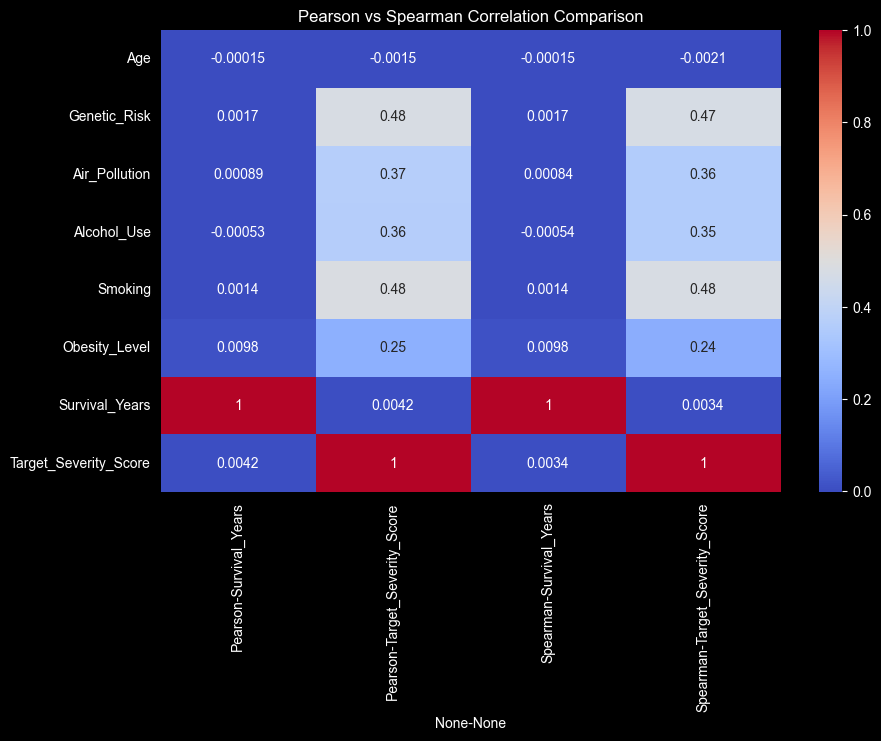

In [28]:
plt.figure(figsize=(10,6))
sns.heatmap(correlation_df, annot=True, cmap="coolwarm")
plt.title("Pearson vs Spearman Correlation Comparison")
plt.show()

In [29]:
severity_predictors = correlation_df["Pearson"]["Target_Severity_Score"] \
    .drop(target) \
    .sort_values(ascending=False)

severity_predictors

Smoking          0.484420
Genetic_Risk     0.478700
Air_Pollution    0.366963
Alcohol_Use      0.363250
Obesity_Level    0.251366
Age             -0.001481
Name: Target_Severity_Score, dtype: float64

In [30]:
survival_predictors = correlation_df["Pearson"]["Survival_Years"] \
    .drop(target) \
    .sort_values(ascending=False)

survival_predictors

Obesity_Level    0.009771
Genetic_Risk     0.001708
Smoking          0.001371
Air_Pollution    0.000893
Age             -0.000147
Alcohol_Use     -0.000527
Name: Survival_Years, dtype: float64

C:\Users\prath\AppData\Local\Temp\ipykernel_1872\1243429449.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


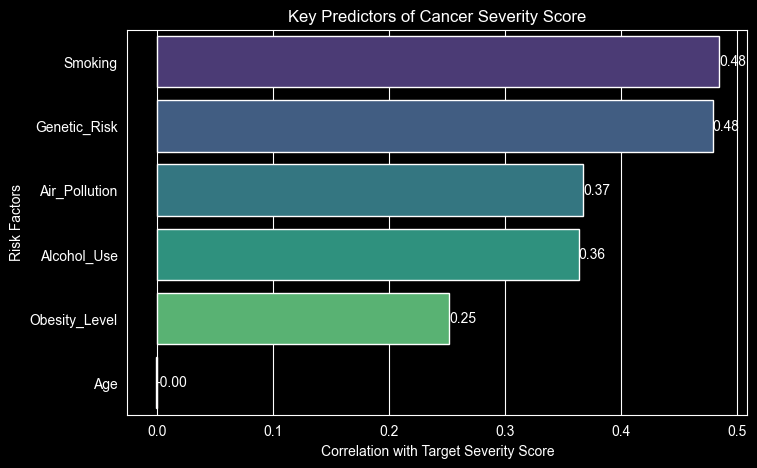

In [31]:
plt.figure(figsize=(8,5))

ax = sns.barplot(
    x=severity_predictors.values,
    y=severity_predictors.index,
    palette="viridis"
)

for i, v in enumerate(severity_predictors.values):
    ax.text(v, i, f"{v:.2f}", va='center')

plt.title("Key Predictors of Cancer Severity Score")
plt.xlabel("Correlation with Target Severity Score")
plt.ylabel("Risk Factors")

plt.show()

### Analysis and Interpretation

The bar chart ranks risk factors based on their correlation with the cancer severity score.

Factors with higher correlation values show stronger associations with severity. The results indicate that lifestyle and genetic factors contribute more strongly to cancer severity compared to age and environmental exposure variables.

This suggests that cancer severity is influenced by multiple interacting risk factors rather than a single dominant variable.

### Explore the economic burden of cancer treatment across different demographics and countries.

In [32]:
df = data
df

,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
0,PT0000000,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92
1,PT0000001,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65
2,PT0000002,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84
3,PT0000003,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12
4,PT0000004,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,PT0049995,80,Male,Pakistan,2023,2.3,7.5,2.8,3.8,2.9,Leukemia,Stage 0,71463.70,1.0,3.63
49996,PT0049996,40,Female,USA,2018,6.4,3.5,2.9,9.0,9.8,Colon,Stage I,49619.66,0.4,6.03
49997,PT0049997,74,Male,Pakistan,2015,6.2,1.6,8.7,4.7,4.0,Breast,Stage 0,5338.25,2.7,6.02
49998,PT0049998,21,Male,Brazil,2018,4.0,6.5,7.6,8.6,8.1,Liver,Stage IV,45100.47,7.5,6.54


In [33]:
country_gender_cost = df.groupby(["Country_Region" , "Gender"])["Treatment_Cost_USD"].mean().reset_index()

In [34]:
df["Age_Group"] = pd.cut(df["Age"],bins=[0,30,45,60,75,100] , labels=["0-30" ,"31-45" ,"46-60" ,"61-75","76+"])
df

,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score,Age_Group
0,PT0000000,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92,61-75
1,PT0000001,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65,31-45
2,PT0000002,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84,76+
3,PT0000003,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12,31-45
4,PT0000004,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62,31-45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,PT0049995,80,Male,Pakistan,2023,2.3,7.5,2.8,3.8,2.9,Leukemia,Stage 0,71463.70,1.0,3.63,76+
49996,PT0049996,40,Female,USA,2018,6.4,3.5,2.9,9.0,9.8,Colon,Stage I,49619.66,0.4,6.03,31-45
49997,PT0049997,74,Male,Pakistan,2015,6.2,1.6,8.7,4.7,4.0,Breast,Stage 0,5338.25,2.7,6.02,61-75
49998,PT0049998,21,Male,Brazil,2018,4.0,6.5,7.6,8.6,8.1,Liver,Stage IV,45100.47,7.5,6.54,0-30


C:\Users\prath\AppData\Local\Temp\ipykernel_1872\3963152905.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  country_age_cost = df.groupby(["Country_Region" , "Age_Group","Gender"])["Treatment_Cost_USD"].mean().reset_index()


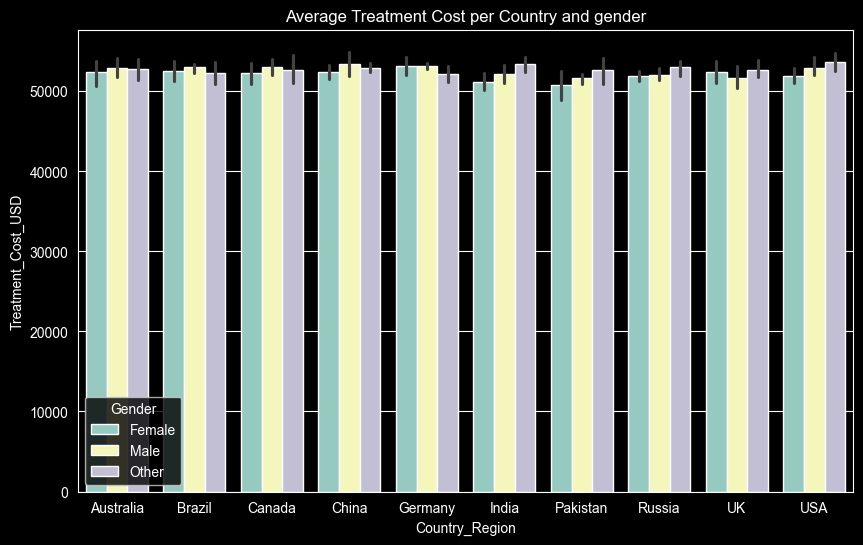

In [35]:
country_age_cost = df.groupby(["Country_Region" , "Age_Group","Gender"])["Treatment_Cost_USD"].mean().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(data=country_age_cost, x="Country_Region", y="Treatment_Cost_USD" , hue="Gender")
plt.title("Average Treatment Cost per Country and gender")
plt.show()

C:\Users\prath\AppData\Local\Temp\ipykernel_1872\1441519814.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  country_age_cost = df.groupby(["Country_Region" , "Age_Group"])["Treatment_Cost_USD"].mean().reset_index()


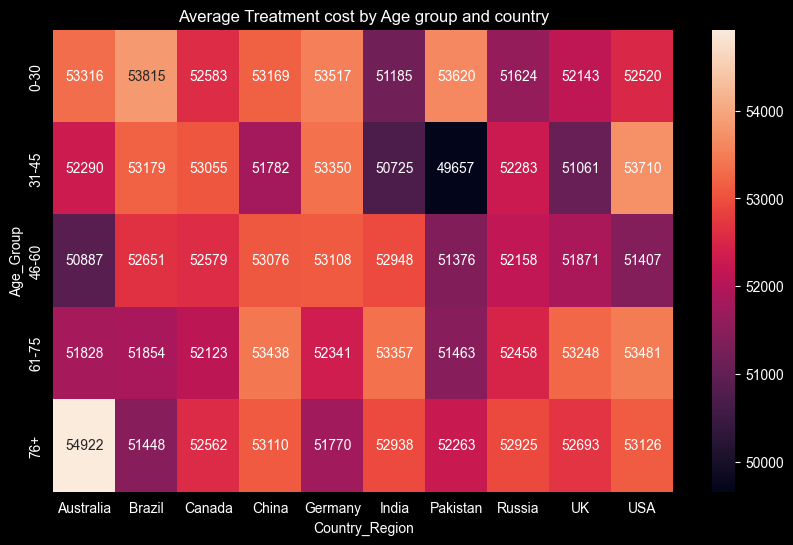

In [36]:
country_age_cost = df.groupby(["Country_Region" , "Age_Group"])["Treatment_Cost_USD"].mean().reset_index()
heatmap_data = country_age_cost.pivot(index="Age_Group" , columns ="Country_Region" , values="Treatment_Cost_USD")

plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, annot=True, fmt=".0f")
plt.title("Average Treatment cost by Age group and country")
plt.show()

### Analysis and Interpretation

#### Geographic Differences in Treatment Costs
Cancer treatment costs vary noticeably across countries. Developed countries such as the USA, Australia, and China show higher average treatment costs, indicating a greater financial burden within advanced healthcare systems. In contrast, countries like India and Pakistan have lower average costs, which may reflect lower healthcare pricing or limited access to expensive treatment options. These differences highlight global inequality in healthcare affordability.

#### Gender-Based Cost Comparison
Treatment costs are relatively similar across genders in all countries. This suggests that there is no significant gender-based difference in cancer treatment expenses, indicating consistent pricing and access to care regardless of gender.

#### Age and Treatment Cost Relationship
Treatment costs generally increase with age, especially for patients aged 60 years and above. Older individuals may require more complex treatments, longer care periods, or management of additional health conditions, which increases overall healthcare expenses. This pattern shows that elderly populations face higher economic burden from cancer treatment.

#### Influence of Healthcare Systems
Countries with strong public healthcare systems, such as Canada, Germany, and the UK, show more stable treatment costs across age groups. This consistency suggests that healthcare subsidies and government-supported systems help reduce financial variation and protect patients from extreme treatment expenses.

### Key Insight
The economic burden of cancer treatment is influenced more by healthcare systems and patient age than by gender. Early detection and strong public healthcare support can play an important role in reducing financial strain on patients.

### Assess whether higher treatment cost is associated with longer survival

Null Hypothesis (Ho) -: There is no correlation between treatment cost and survival years.

Alternative Hypothesis(H1) -: There is a correlation(positive or negative) between treatment cost and survival years.


In [42]:
from scipy.stats import pearsonr , spearmanr

x = data["Treatment_Cost_USD"]
y=data["Survival_Years"]

#performing pearson correlation test
pearson_corr , pearson_p = pearsonr(x,y)
print(f"pearson correlation coefficient :{pearson_corr}")
print(f"pearson p value :{pearson_p}")

#Spearman correlation test
spearman_corr , spearman_p = spearmanr(x,y)
print(f"spearman correlation coefficient :{spearman_corr}")
print(f"spearman p value :{spearman_p}")

alpha = 0.05

def interpret_corr(corr , p ,method):
    if p<alpha:
        print(f"{method}, we reject the null hypothesis")
    else:
        print(f"{method}, we failed to reject null hypothesis")

interpret_corr(pearson_corr , pearson_p , "Pearson")
interpret_corr(spearman_corr , spearman_p , "Spearman")


pearson correlation coefficient :-0.00042940542830214966
pearson p value :0.9235082012963338
spearman correlation coefficient :-0.0004454737292549569
spearman p value :0.9206551702014917
Pearson, we failed to reject null hypothesis
Spearman, we failed to reject null hypothesis


<Axes: xlabel='Treatment_Cost_USD', ylabel='Survival_Years'>

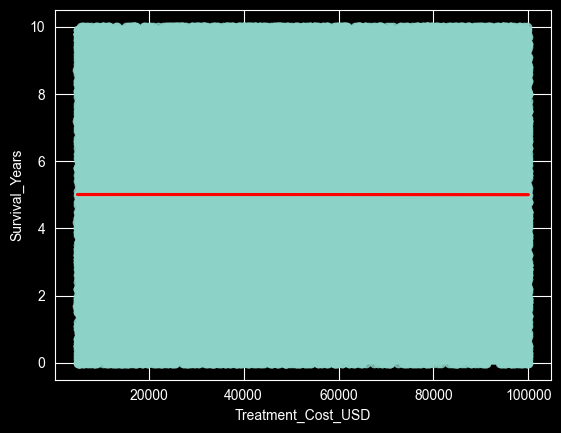

In [44]:
sns.regplot(x=x ,y=y , line_kws={'color':'red'})

### Key Insight

The analysis shows that higher treatment cost does not necessarily lead to longer survival. Survival outcomes appear to depend on other medical or patient-related factors rather than treatment expenses alone.

### Evaluate if higher cancer stage lead to greater treatment costs and reduced survival years.

In [45]:
df1 = data.copy()
df1

,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score,Age_Group
0,PT0000000,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92,61-75
1,PT0000001,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65,31-45
2,PT0000002,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84,76+
3,PT0000003,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12,31-45
4,PT0000004,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62,31-45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,PT0049995,80,Male,Pakistan,2023,2.3,7.5,2.8,3.8,2.9,Leukemia,Stage 0,71463.70,1.0,3.63,76+
49996,PT0049996,40,Female,USA,2018,6.4,3.5,2.9,9.0,9.8,Colon,Stage I,49619.66,0.4,6.03,31-45
49997,PT0049997,74,Male,Pakistan,2015,6.2,1.6,8.7,4.7,4.0,Breast,Stage 0,5338.25,2.7,6.02,61-75
49998,PT0049998,21,Male,Brazil,2018,4.0,6.5,7.6,8.6,8.1,Liver,Stage IV,45100.47,7.5,6.54,0-30


In [47]:
df1["Cancer_Stage"]

0        Stage III
1          Stage 0
2         Stage II
3          Stage I
4        Stage III
           ...    
49995      Stage 0
49996      Stage I
49997      Stage 0
49998     Stage IV
49999      Stage 0
Name: Cancer_Stage, Length: 50000, dtype: object

In [50]:
stage_order =['Stage 0' ,'Stage I','Stage II',' Stage III','Stage IV']


In [51]:
grouped_stats=df1.groupby("Cancer_Stage")[['Treatment_Cost_USD','Survival_Years']].mean().reset_index()
grouped_stats

,Cancer_Stage,Treatment_Cost_USD,Survival_Years
0,Stage 0,52572.589493,5.015199
1,Stage I,52674.079638,5.012990
2,Stage II,52082.841258,4.995170
3,Stage III,52708.197506,5.036311
4,Stage IV,52302.471041,4.972596


### key insight :
The average treatment cost is same for all the stages

### Examine whether higher genetic risk amplifies the negative effects of smoking on cancer severity and survival outcomes.


In [81]:
import statsmodels.formula.api as smf
model = smf.ols("Target_Severity_Score ~ Genetic_Risk*Smoking" , data =data).fit()
model.summary2().tables[1].loc['Genetic_Risk:Smoking']

Coef.      -0.000228
Std.Err.    0.000471
t          -0.484187
P>|t|       0.628255
[0.025     -0.001150
0.975]      0.000694
Name: Genetic_Risk:Smoking, dtype: float64

In [ ]:
p_value = 0.628255


Interpretation: The interaction coefficient is negative but very small: -0.000228

The p-value = 0.628, which is greater than 0.05, so we fail to reject the null hypothesis

🧪 Conclusion (Statistical): ✅ Test Used: Multiple Linear Regression with interaction term

📌 Null Hypothesis (H₀): No interaction effect between genetic risk and smoking

📌 Alternative Hypothesis (H₁): There is an interaction effect

The interaction effect between Genetic Risk and Smoking on Target Severity Score is not statistically significant (p = 0.628 > 0.05).

This means that based on your data, there is no evidence that Genetic Risk amplifies or reduces the effect of Smoking on the Target Severity Score.

In other words, smoking and genetic risk may each have independent effects (or none), but they do not interact in a way that significantly changes the outcome.

## Final Project Conclusion

This analysis explored factors influencing cancer severity, survival outcomes, and treatment costs using statistical and inferential techniques.

Key findings include:

- Lifestyle and genetic factors show stronger associations with cancer severity compared to demographic variables.
- Approximately 40% of cancers are diagnosed at an early stage across cancer types, indicating moderate effectiveness of early detection.
- Treatment costs vary significantly across countries and age groups, highlighting global economic disparities in healthcare burden.
- Hypothesis testing revealed no statistically significant relationship between treatment cost and survival years, suggesting that higher spending alone does not guarantee better outcomes.

Overall, cancer outcomes appear to be influenced by multiple interacting factors rather than a single dominant variable. Early detection and healthcare system effectiveness may play a more important role than treatment expenditure alone.